# Outline

1) Objective

2) Data Exploration

    2.1) Descriptive Statistics
    
    2.2) Data Visualizations
    
3) Linear Regression Models

4) Model Validation

5) Predictions

6) Conclusion

7) Next Steps

# 1 Objective
Success will be based on accurately the predictions of the number of wins based on past data in the chosen time periods.

We aim to determine how teams are able win in:
- 1990-2010

I chose this time period because this is when all the current MLB teams were established.

# 2 Data Exploration

In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np
from pandas import Series, DataFrame
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot
from scipy.stats import pearsonr
# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

C:\Users\carlo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [58]:
baseball=pd.read_csv(r'baseball_teams.csv', header=0)
baseball.columns=baseball.columns.str.replace(' ', '_')
baseball_1990_2010=pd.DataFrame(baseball[2047:2655])

In [59]:
baseball.var()

Year_                  1.723834e+03
Final_Standing         5.398253e+00
Games_Played           5.395051e+02
Unnamed:_7             2.207763e+01
Games_Won              3.111838e+02
Games_Lost             3.019976e+02
Unnamed:_10            1.493375e-01
League_Win             8.838555e-02
World_Series           4.515867e-02
Runs_Scored            1.842487e+04
At_Bats                5.633278e+05
Hits                   4.835232e+04
Doubles                3.444821e+03
Triples                4.958914e+02
Home_Runs              3.778352e+03
Walks                  1.757902e+04
Strike_Outs            8.914511e+04
Stolen_Bases           5.014208e+03
Caught_Stealing        4.667211e+02
Hit_By_Pitch           1.832643e+02
Sacrifice_Fly          7.431096e+01
Runs_Against           1.820206e+04
Earned_Runs            2.159666e+04
Earned_Run_Average     5.815132e-01
Complete_Games         1.500238e+03
Shutout                2.598276e+01
Saves                  2.650807e+02
Infield_Put_Outs       3.981

In [94]:
baseball_1990_2010.head()

,Year_,League,Team_,Franchise_,Division,Final_Standing,Games_Played,Unnamed:_7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2047,1990,NL,ATL,ATL,W,6,162,81.0,65,97,...,1527,128,579,938,158,133.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,980129.0
2048,1990,AL,BAL,BAL,E,5,161,80.0,76,85,...,1445,161,537,776,91,151.0,0.98,Baltimore Orioles,Memorial Stadium,2415189.0
2049,1990,AL,BOS,BOS,E,1,162,81.0,88,74,...,1439,92,519,997,123,154.0,0.98,Boston Red Sox,Fenway Park II,2528986.0
2050,1990,AL,CAL,ANA,W,4,162,81.0,80,82,...,1482,106,544,944,140,186.0,0.97,California Angels,Anaheim Stadium,2555688.0
2051,1990,AL,CHA,CHW,W,2,162,80.0,94,68,...,1313,106,548,914,124,169.0,0.98,Chicago White Sox,Comiskey Park,2002357.0


I'll be choosing 8 variables to explore descriptive statistics and show visualizations on each variable.

Variables: 
    - Runs Scored
    - Hits
    - Walks
    - Stolen Bases
    - Earned Run Average
    - Hits Allowed
    - Walks Allowed
    - Fielding Percentage

I chose these variables because I think in general these are the main reasons why a team is able to win games.
E.g, in order to score runs you need hitters to get on base via hits or walks, steals can create run opportunities when baserunners are in scoring position (when the runner is on 2nd or 3rd base). To minimize the runs against you need a very strong pitching staff and fielding defense which can be represented by low earned run average and a high fielding percentage.

In [62]:
baseball_1990_2010.isnull().sum()

Year_                    0
League                   0
Team_                    0
Franchise_               0
Division                 0
Final_Standing           0
Games_Played             0
Unnamed:_7               0
Games_Won                0
Games_Lost               0
Unnamed:_10             28
League_Win              28
World_Series            28
Runs_Scored              0
At_Bats                  0
Hits                     0
Doubles                  0
Triples                  0
Home_Runs                0
Walks                    0
Strike_Outs              0
Stolen_Bases             0
Caught_Stealing          0
Hit_By_Pitch           278
Sacrifice_Fly          278
Runs_Against             0
Earned_Runs              0
Earned_Run_Average       0
Complete_Games           0
Shutout                  0
Saves                    0
Infield_Put_Outs         0
Hits_Allowed             0
Home_Run_Allowed         0
Walks_Allowed            0
Strikeouts_Allowed       0
Errors                   0
D

ALthough there are quite a bit of null values in the data set, these variables will not be used for the building of the models

# 2.1 Descriptive Statistics 

In [63]:
baseball_1990_2010[['Runs_Scored','Hits','Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed','Fielding_Percentage']].describe()

,Runs_Scored,Hits,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,747.483553,1441.445724,536.782895,102.462171,4.344375,1441.442434,536.781250,0.980138
std,93.733980,117.725690,78.410122,35.511353,0.547203,124.154087,73.369502,0.004776
min,466.000000,963.000000,319.000000,25.000000,3.060000,929.000000,288.000000,0.970000
25%,686.000000,1398.000000,486.750000,75.750000,3.950000,1385.000000,489.000000,0.980000
50%,747.000000,1452.500000,533.000000,99.000000,4.310000,1452.000000,537.500000,0.980000
75%,807.000000,1510.250000,589.250000,124.250000,4.712500,1521.250000,582.000000,0.983000
max,1009.000000,1684.000000,775.000000,256.000000,6.380000,1734.000000,784.000000,0.989000


# 2.2 Visualizations of histograms, boxplots, modes, and comments about the distribution of each variable

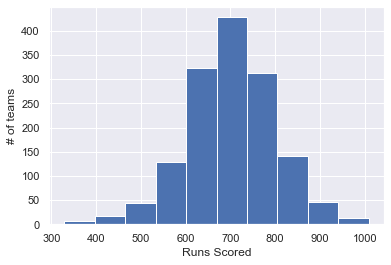

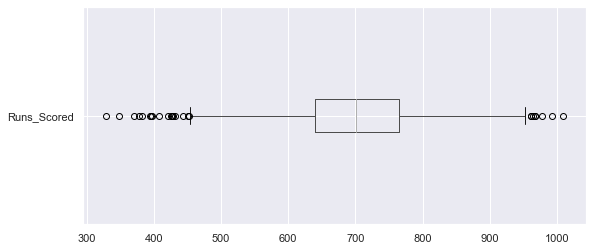

Mode    Runs_Scored
0          691


In [8]:
baseball_1990_2010['Runs_Scored'].hist()
plt.xlabel('Runs Scored')
plt.ylabel('# of teams')
plt.show()
#
baseball_1990_2010.boxplot('Runs_Scored', figsize=(9,4), vert=False)
plt.show()
#
#does look symmetric
print('Mode',pd.DataFrame(baseball_1990_2010['Runs_Scored']).mode())
#one mode
#widely spread of data but most datapoints lies in the middle
#there are a lot of outliers

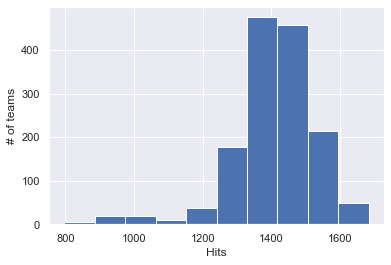

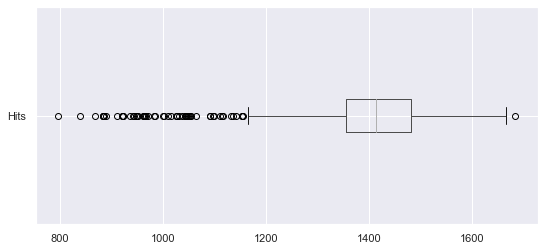

Mode    Hits
0  1400


In [9]:
baseball_1990_2010['Hits'].hist()
plt.xlabel('Hits')
plt.ylabel('# of teams')
plt.show()
#
baseball_1990_2010.boxplot('Hits', figsize=(9,4), vert=False)
plt.show()
#
#negatively skewed
print('Mode',pd.DataFrame(baseball_1990_2010['Hits']).mode())
#one mode
#widely spread of data but most datapoints lies on the right side
#there are a lot of outliers

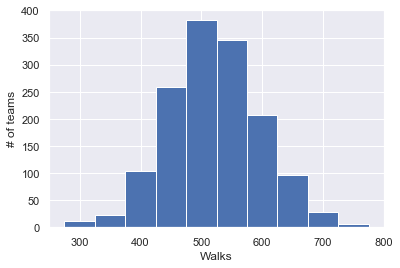

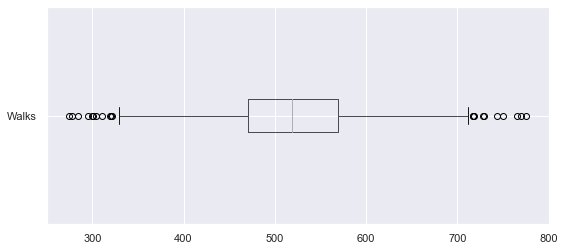

Mode    Walks
0    500
1    503
2    509


In [10]:
baseball_1990_2010['Walks'].hist()
plt.xlabel('Walks')
plt.ylabel('# of teams')
plt.show()
#
baseball_1990_2010.boxplot('Walks', figsize=(9,4), vert=False)
plt.show()
#
#looks symmetric
print('Mode',pd.DataFrame(baseball_1990_2010['Walks']).mode())
#3 modes
#widely spread of data but most datapoints lies on the right side
#there is a moderate amount of outliers

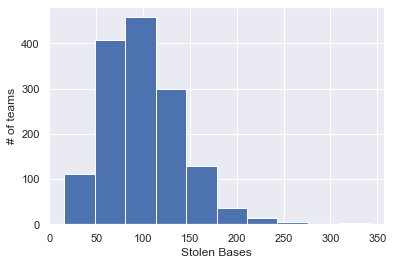

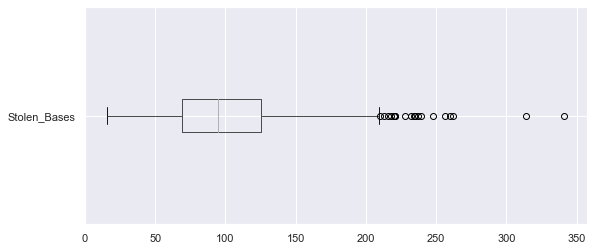

Mode    Stolen_Bases
0         100.0


In [11]:
baseball_1990_2010['Stolen_Bases'].hist()
plt.xlabel('Stolen Bases')
plt.ylabel('# of teams')
plt.show()
#
baseball_1990_2010.boxplot('Stolen_Bases', figsize=(9,4), vert=False)
plt.show()
#
#positively skewed
print('Mode',pd.DataFrame(baseball_1990_2010['Stolen_Bases']).mode())
#one mode
#widely spread of data but most datapoints lies on the left side
#there is a moderate amount of outliers

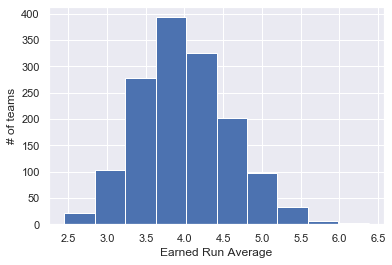

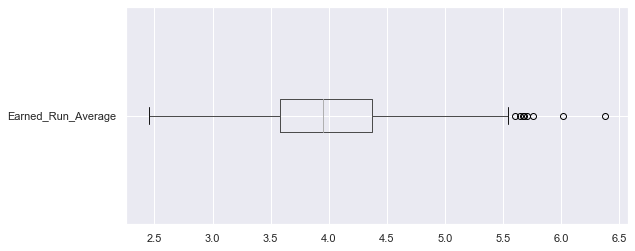

Mode    Earned_Run_Average
0                3.84


In [12]:
baseball_1990_2010['Earned_Run_Average'].hist()
plt.xlabel('Earned Run Average')
plt.ylabel('# of teams')
plt.show()
baseball_1990_2010.boxplot('Earned_Run_Average', figsize=(9,4), vert=False)
plt.show()
#it's symmetric
print('Mode',pd.DataFrame(baseball_1990_2010['Earned_Run_Average']).mode())
#one mode
#widely spread of data but most points lies in the middle
#a small amount of outliers

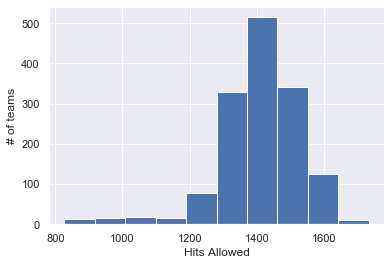

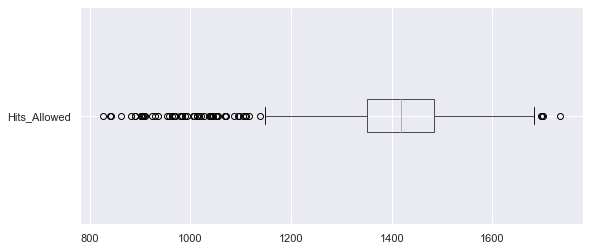

Mode    Hits_Allowed
0          1402
1          1443


In [13]:
baseball_1960_2015['Hits_Allowed'].hist()
plt.xlabel('Hits Allowed')
plt.ylabel('# of teams')
plt.show()
#
baseball_1960_2015.boxplot('Hits_Allowed', figsize=(9,4), vert=False)
plt.show()
#
#appears to be symmetric
print('Mode',pd.DataFrame(baseball_1960_2015['Hits_Allowed']).mode())
#one mode
#widely spread of data but most datapoints lies on the right side
#there are a lot of outliers

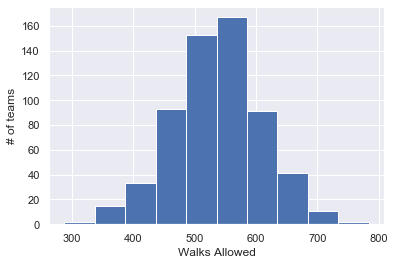

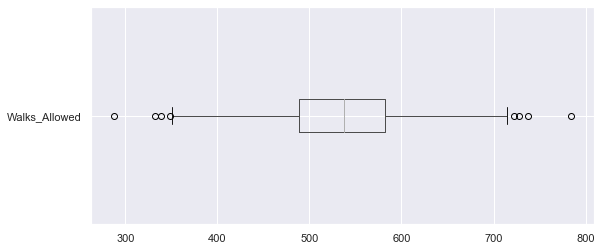

Mode    Walks_Allowed
0            546


In [64]:
baseball_1990_2010['Walks_Allowed'].hist()
plt.xlabel('Walks Allowed')
plt.ylabel('# of teams')
plt.show()
baseball_1990_2010.boxplot('Walks_Allowed', figsize=(9,4), vert=False)
plt.show()
#it's almost symmetric
print('Mode',pd.DataFrame(baseball_1990_2010['Walks_Allowed']).mode())
#one mode
#widely spread of data but most points lies in the middle
#there's a moderate amount of outliers

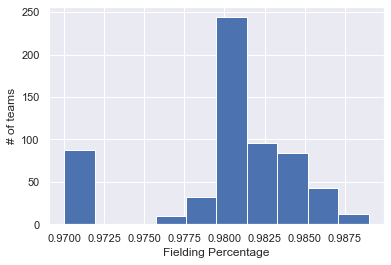

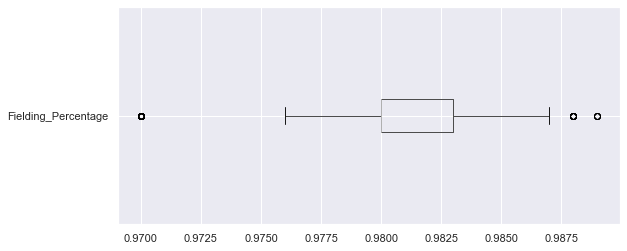

Mode    Fielding_Percentage
0                 0.98


In [65]:
baseball_1990_2010['Fielding_Percentage'].hist()
plt.xlabel('Fielding Percentage')
plt.ylabel('# of teams')
plt.show()
baseball_1990_2010.boxplot('Fielding_Percentage', figsize=(9,4), vert=False)
plt.show()
#positively skewed
print('Mode',pd.DataFrame(baseball_1990_2010['Fielding_Percentage']).mode())
#one mode
#widely spread of data but most points lies on the right side
#no outliers

## Normal Distribution Validity
Variables: Run scored, Hits, Walks, Stolen Bases, Earned Run Average, Hits Allowed, Walks Allowed, Fielding Percentage

Here we want to get an understanding of the data we're dealing with in terms of the spread with of the mean and standard deviation.

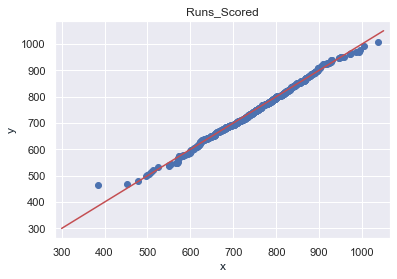

In [66]:
x=baseball_1990_2010['Runs_Scored']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(300,1050,baseball_1990_2010['Runs_Scored'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Runs_Scored')
plt.show()
#looks normally distributed

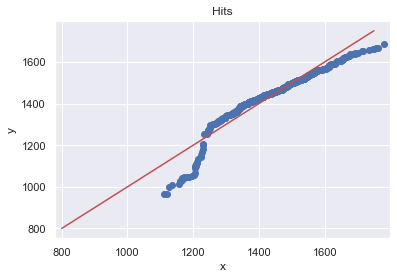

In [67]:
x=baseball_1990_2010['Hits']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(800,1750,baseball_1990_2010['Hits'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Hits')
plt.show()
#Doesn't look normally distributed

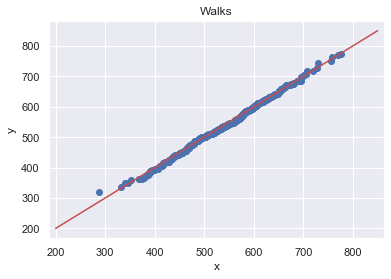

In [68]:
x=baseball_1990_2010['Walks']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(200,850,baseball_1990_2010['Walks'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Walks')
plt.show()
#looks very normally distributed

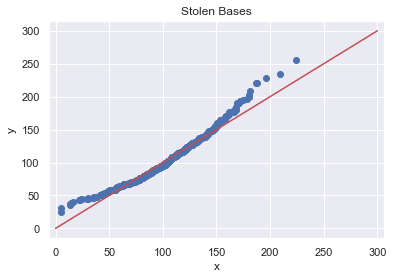

In [69]:
x=baseball_1990_2010['Stolen_Bases']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(0,300,baseball_1990_2010['Stolen_Bases'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Stolen Bases')
plt.show()
#doesn't look normally distributed

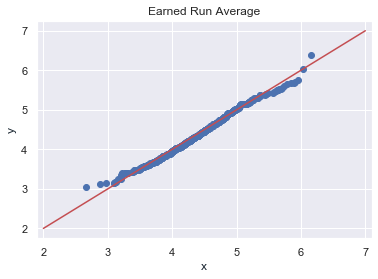

In [70]:
x=baseball_1990_2010['Earned_Run_Average']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(2,7,baseball_1990_2010['Earned_Run_Average'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Earned Run Average')
plt.show()
#looks very normally distributed

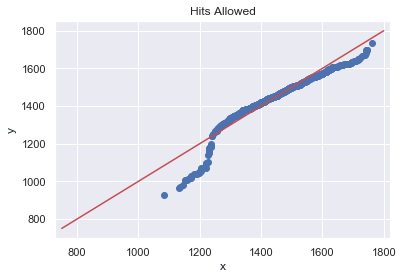

In [71]:
x=baseball_1990_2010['Hits_Allowed']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(750,1800,baseball_1990_2010['Hits_Allowed'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Hits Allowed')
plt.show()
#doesn't looks normally distributed

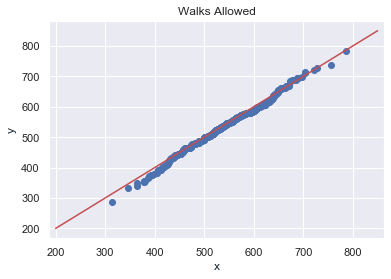

In [72]:
x=baseball_1990_2010['Walks_Allowed']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(200,850,baseball_1990_2010['Walks_Allowed'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Walks Allowed')
plt.show()
#looks very normally distributed

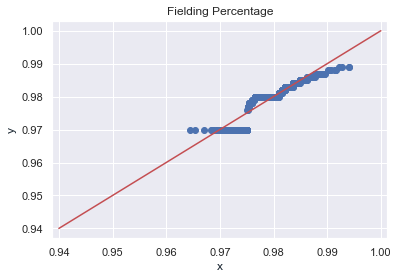

In [73]:
x=baseball_1990_2010['Fielding_Percentage']
y = np.random.normal(loc=x.mean(), scale=x.std(), size=x.count())
pp_x=sm.ProbPlot(x)
pp_y=sm.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
#
x = np.linspace(0.94,1,baseball_1990_2010['Fielding_Percentage'].count())
y = x
plt.plot(x, y, '-r', label='y=x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Fielding Percentage')
plt.show()
#doesn't look normally distributed but we will still keep this as the variation of numbers doesn't appear to be huge

# 3: Linear Regression Models

In [91]:
baseball_1990_2010=pd.DataFrame(baseball[2047:2655])

In [92]:
lin_baseball_1990_2010 = smf.ols(formula = 'Games_Won ~ Runs_Scored + Hits + Walks + Stolen_Bases + Earned_Run_Average + Walks_Allowed + Fielding_Percentage', data=baseball_1990_2010).fit()

# 4: Model Validation

In [93]:
lin_baseball_1990_2010.summary()
#r^2 and adj r^2 are strongly significant
#f-statistic is very far from 1, which can help make this model more acceptable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     706.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          6.26e-285
Time:                        19:51:34   Log-Likelihood:                -1711.1
No. Observations:                 608   AIC:                             3438.
Df Residuals:                     600   BIC:                             3474.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -202.2472     36.213     -5.585      0.000    -273.366    -131.128
Runs_Scored             0.0907      0.004     22.483      0.000       0.083       0.099
Hits                    0.0031      0.003      1.139      0.255      -0.002       0.008
Walks                   0.0079      0.003      2.585      0.010       0.002       0.014
Stolen_Bases            0.0131      0.005      2.674      0.008       0.003       0.023
Earned_Run_Average    -15.0638      0.376    -40.056      0.000     -15.802     -14.325
Walks_Allowed          -0.0055      0.003     -1.945      0.052      -0.011    5.39e-05
Fielding_Percentage   277.7216     36.998      7.506      0.000     205.060     350.383
==============================================================================
Omnibus:                        0.645   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.739
Skew:                          -0.029   Prob(JB):                        0.691
Kurtosis:                       2.839   Cond. No.                     5.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5: Predictions

Using the historic data, I will try to accurately predict the number of wins for the following teams

I will only be doing the time period of 1990-2015 because all the current 30 franchises were made during this time period.

1990-2015: New York Yankees (2012 & 2015), Toronto Blue Jays (2012 & 2015)

In [77]:
Yankees=baseball_1990_2010[baseball_1990_2010['Franchise_']=='NYY']
Blue_Jays=baseball_1990_2010[baseball_1990_2010['Franchise_']=='TOR']

In [78]:
#Yankees
#Blue_Jays
x_2012=baseball[baseball['Year_'] == 2012]
x_2015=baseball[baseball['Year_'] == 2015]
#
x_Tor=x_2012[x_2012['Franchise_']=='TOR']
y_Tor=x_2015[x_2015['Franchise_']=='TOR']
x_NYY=x_2012[x_2012['Franchise_']=='NYY']
y_NYY=x_2015[x_2015['Franchise_']=='NYY']

In [79]:
x_NYY[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2702,804,245,565,93.0,3.84,1401,431,0.987


In [80]:
x_Tor[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2713,716,198,473,123.0,4.64,1439,574,0.984


In [81]:
y_NYY[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2781,764,212,554,63.0,4.03,1416,474,0.985


In [82]:
y_Tor[['Runs_Scored', 'Home_Runs', 'Walks', 'Stolen_Bases', 'Earned_Run_Average', 'Hits_Allowed', 'Walks_Allowed', 'Fielding_Percentage']]

,Runs_Scored,Home_Runs,Walks,Stolen_Bases,Earned_Run_Average,Hits_Allowed,Walks_Allowed,Fielding_Percentage
2780,891,232,570,88.0,3.8,1353,397,0.985


In [83]:
Yankees_2012=pd.DataFrame({'Runs_Scored':[804], 'Hits':[1462], 'Walks':[565], 'Stolen_Bases':[93], 'Earned_Run_Average':[3.84],'Hits_Allowed':[1401],'Walks_Allowed':[431],'Fielding_Percentage':[0.987]})

BlueJays_2012=pd.DataFrame({'Runs_Scored':[716], 'Hits':[1346], 'Walks':[473], 'Stolen_Bases':[123], 'Earned_Run_Average':[4.64],'Hits_Allowed':[1439],'Walks_Allowed':[574],'Fielding_Percentage':[0.984]})

Yankees_2015=pd.DataFrame({'Runs_Scored':[764], 'Hits':[1397], 'Walks':[554], 'Stolen_Bases':[63], 'Earned_Run_Average':[4.03],'Hits_Allowed':[1416],'Walks_Allowed':[474],'Fielding_Percentage':[0.985]})

BlueJays_2015=pd.DataFrame({'Runs_Scored':[891], 'Hits':[1480], 'Walks':[570],'Stolen_Bases':[88],'Earned_Run_Average':[3.8],'Hits_Allowed':[1353],'Walks_Allowed':[397],'Fielding_Percentage':[0.985]})

In [84]:
lin_baseball_1990_2010.predict(Yankees_2012)

0    94.82766
dtype: float64

In [85]:
lin_baseball_1990_2010.predict(BlueJays_2012)

0    72.469309
dtype: float64

In [86]:
lin_baseball_1990_2010.predict(Yankees_2015)

0    86.85821
dtype: float64

In [87]:
lin_baseball_1990_2010.predict(BlueJays_2015)

0    102.987503
dtype: float64

# 6: Conclusions

Every prediction was very accurate except for the BlueJays_2015.

This may be because of how good the BlueJays_2015 batters were as that year they were one of the best offensive teams, also backed up by a very strong pitching staff.

Root Mean Square Error

In [88]:
#ii
X=x_NYY[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=x_NYY[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(Yankees_2012)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close
#
X=x_Tor[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=x_Tor[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(BlueJays_2012)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close

#
X=y_NYY[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=y_NYY[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(Yankees_2015)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is very small meaning the prediction is very close

#
X=y_Tor[['Runs_Scored','Hits','Walks','Stolen_Bases','Earned_Run_Average','Hits_Allowed','Walks_Allowed','Fielding_Percentage']]
y=y_Tor[['Games_Won']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred=lin_baseball_1990_2010.predict(BlueJays_2015)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the error is quite big meaning the prediction is off

0.17233999557004154
0.5306913093843377
0.14178969632723692
9.987502520487737


# 7) Next Steps

- Team Placement: 

    The next steps I could take is to consider which teams are in certain leagues or divisions as this can be a biggest 
    difference of a teams Win-Loss Record. Some instances can include how good the other teams in divisions are as teams are 
    scheduled to play teams in their respective division more than certains that are not in their division or league 
    
    
- Ballpark Dimensions:
    
    If a ballpark has short dimensions, this can be a huge factor in creating more home runs and higher E.R.A for certain teams 
    e.g the New York Yankees(Yankee Stadium), Toronto Blue Jays(Rogers Center).Or viceversa in ballpark with bigger dimensions 
    such as Oakland Athletics (Oakland Coliseum), Pittsbrugh Pirates(PNC Park)
    
    
- Weather:
    
    It can affect the travel distance of the ball. If cold, then the ball won't travel as much and may cause positive skew in a team's statsline. Viceversa for when weather is hot. 
    
    I also would need to look weather metrics that are considered to be cold or hot.
    
- Variables:
    I can consider the correlations of the variables on which ones are suited best for Games_Won